#Ch.8  도식화와 시각화

##8.1 matplotlib API 간략하게 살펴보기

- matplotlib 라이브러리는 파이썬을 활용한 데이터 시각화에 자주 쓰이는 좋은 라이브러리입니다. 이 라이브러리를 활용해서 히스토그램, 박스플롯 같은 차트를 쉽고 빠르게 그릴 수 있습니다.
- matplotlib.pyplot  : MATLAB 처럼 matplotlib 을 사용할수있게 하는 명령 스타일 함수들(command style functions) 모음이다.

   ex)  figure 생성하고  -> figure에 plotting area 생성 -> plotting area 에 line 그리고  -> label 등을 꾸미고.. etc.

###8.1.1 Figure와 서브플롯

In [755]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [756]:
#%matplotlib inline

In [757]:
#matplotlib API함수는 matplotlib.pyplot 모듈에 포함되어 있으며, 보통 'plt'라는 이름으로 import해서 사용함.
import matplotlib.pyplot as plt

In [758]:
#matplotlib에서 그래프는 Figure 객체 내에서 존재
#Figure는 plt.figure를 사용해서 생성 가능
fig = plt.figure()

In [759]:
type(fig)

matplotlib.figure.Figure

In [760]:
#빈 Figure 객체로는 그래프를 만들 수 없으므로 add_subplot을 사용해 최소한 하나 이상의 서브플롯을 생성해야 함.
#이 코드에서 fig 객체는 크기가 2x2이고 4개의 서브플롯 중에서 첫 번째를 선택하겠다는 의미
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

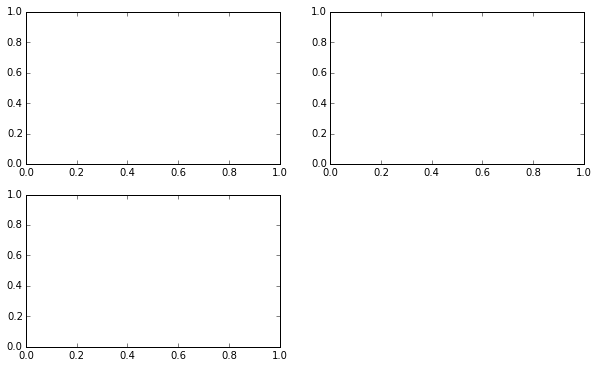

In [761]:
fig

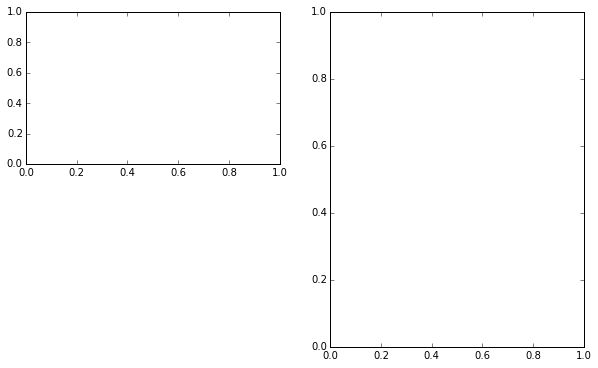

In [762]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(2, 2, 1)
ax2 = fig2.add_subplot(1, 2, 2)

plot이라는 함수는 인자를 여러 개를 받을 수 있는데 위와 같이 x축에 데이터와 y축의 데이터를 받는 것이 가장 자주 사용되는 형식입니다

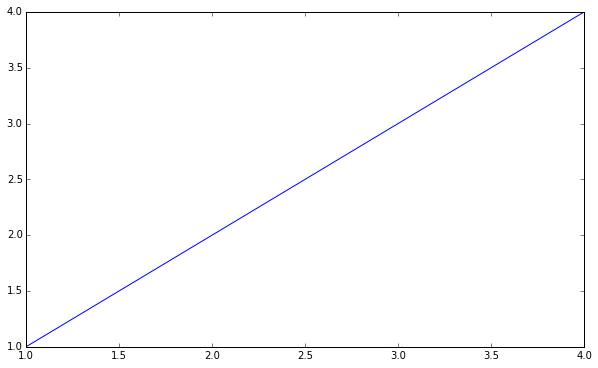

In [763]:
plt.plot([1,2,3,4], [1,2,3,4])

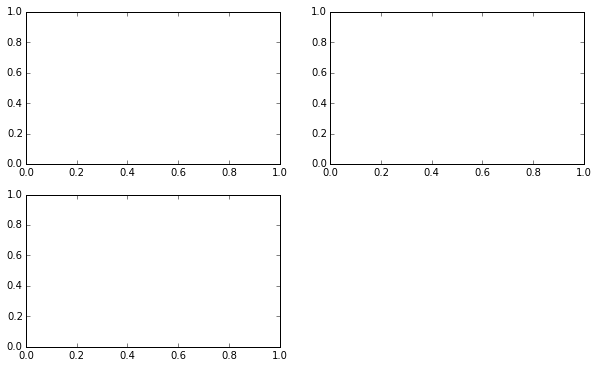

In [764]:
fig

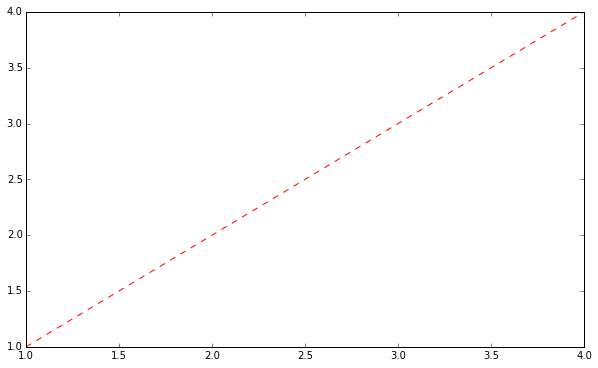

In [765]:
#x축의 데이터 값과 y축의 데이터 값 이후에 추가적으로 색상과 선 스타일을 나타내는 축약 문자열을 넣을 수 있습니다
plt.plot([1,2,3,4], [1,2,3,4], 'r--')

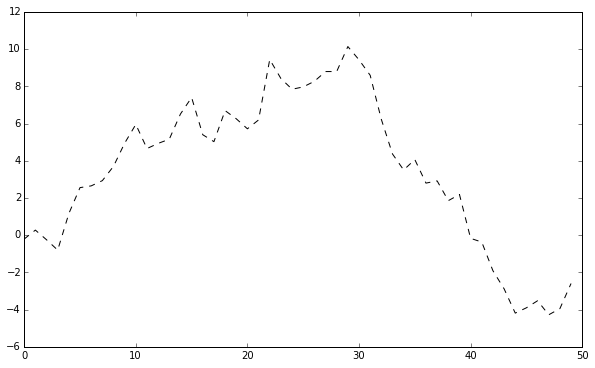

In [766]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

In [767]:
_ = ax1.hist(randn(100), bins=10, color='k', alpha=0.5)
_ = ax3.hist(randn(100), bins=10, color='k', alpha=1)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

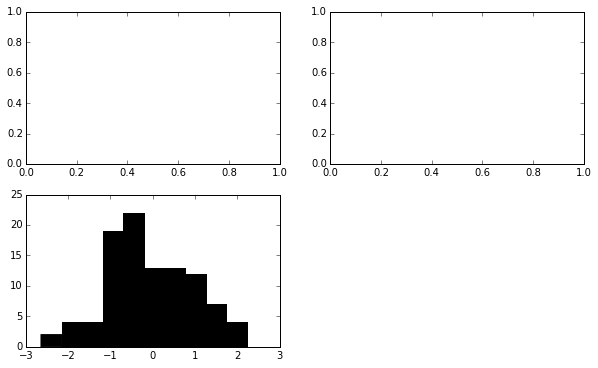

In [768]:
fig

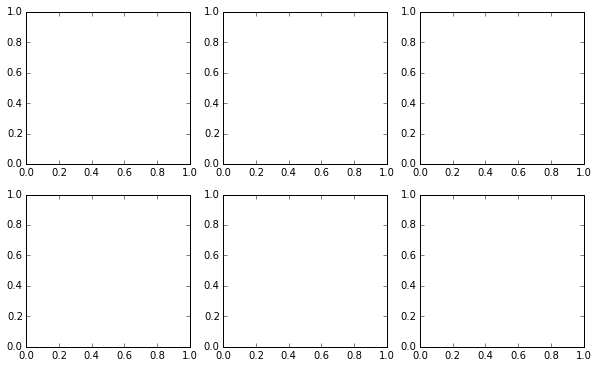

In [769]:
#만약 각 axes의 크기가 같다면 plt.subplots로 fig와 axes들을 동시에 생성 가능.
fig2, axes = plt.subplots(2, 3)

In [844]:
fig.subplots_adjust?

####셔브플롯 간 간격 조절하기

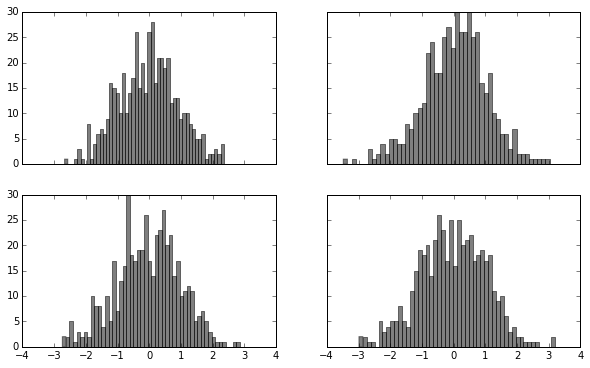

In [786]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

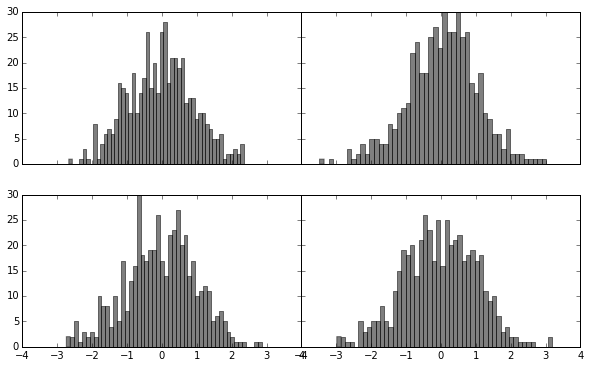

In [791]:
fig.subplots_adjust(wspace=0)
fig

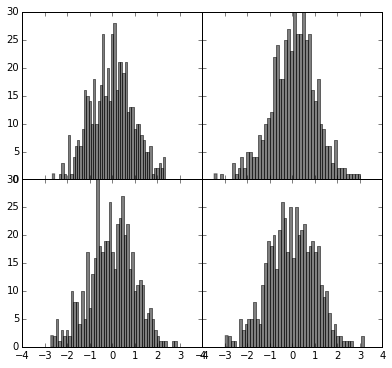

In [821]:
fig.subplots_adjust(hspace=0)
fig

###8.1.2 색상, 마커, 선 스타일

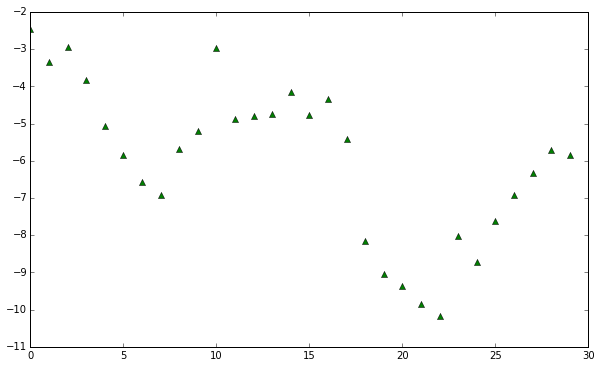

In [875]:
plt.plot(randn(30).cumsum(), 'g^')

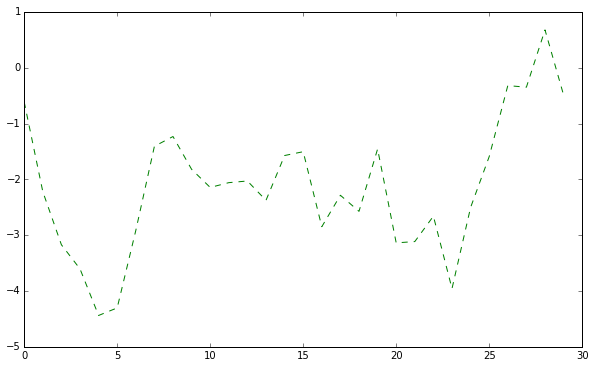

In [876]:
plt.plot(randn(30).cumsum(), 'g--')

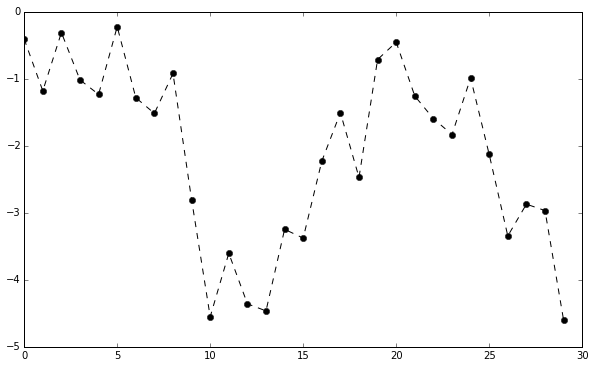

In [879]:
#마커가 있는 선 그래프
plt.plot(randn(30).cumsum(), 'ko--')

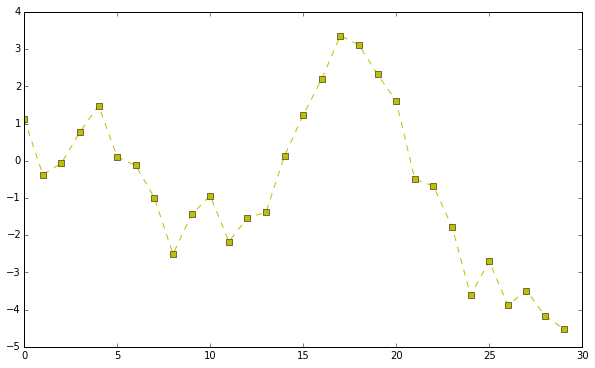

In [890]:
plt.plot(randn(30).cumsum(),color='y', linestyle='dashed', marker='s')

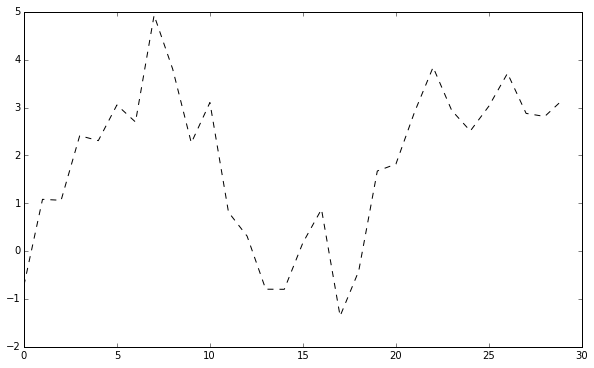

In [892]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

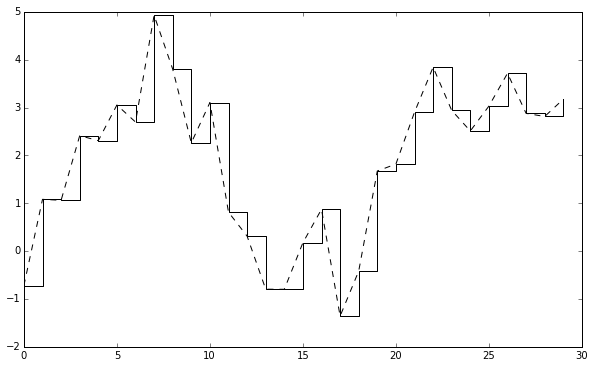

In [895]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post')

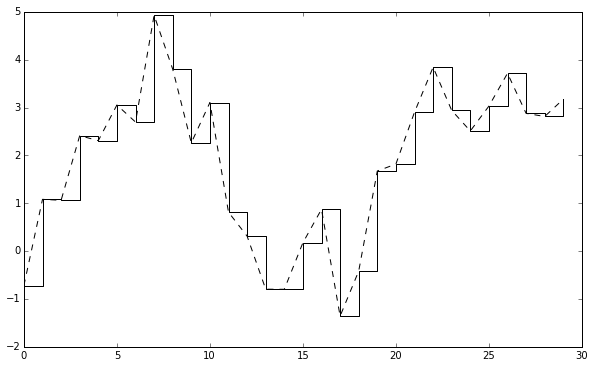

In [899]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

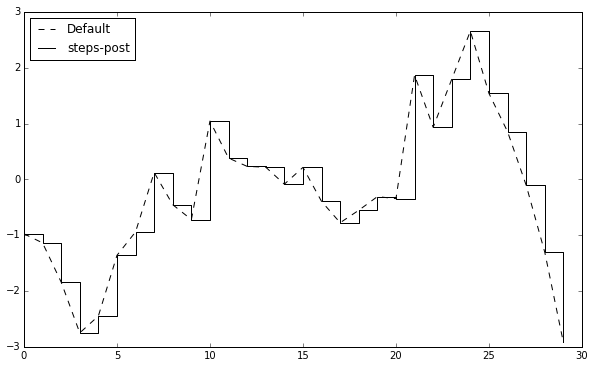

In [777]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

###8.1.3 눈금, 라벨, 범례

####제목, 축 이름, 눈금, 눈금 이름 설정하기

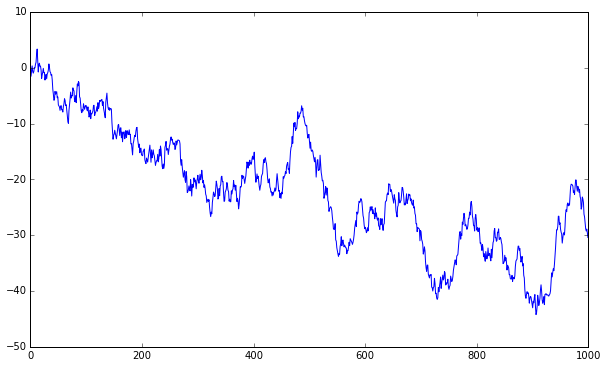

In [909]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())


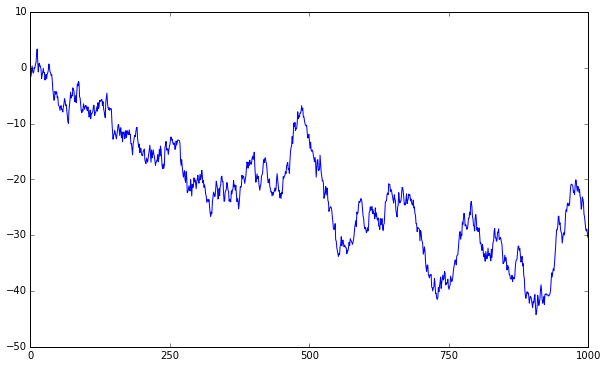

In [910]:
#set_xticks 메서드는 전체 데이터 범위에 맞춰 눈금을 어디에 배치할지 지정함.
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

fig

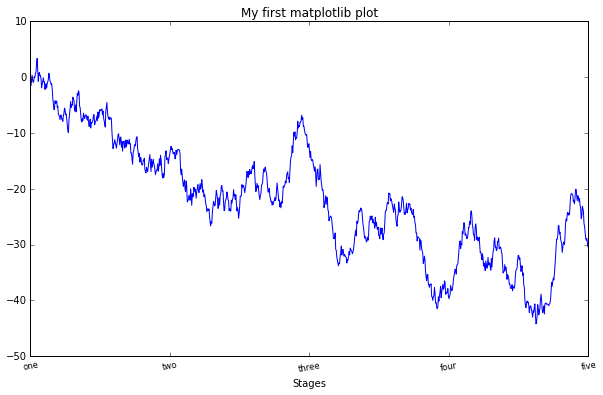

In [914]:
#다른 눈금 이름을 지정하고 싶다면 set_xticklabels를 사용함.

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=10, fontsize='small')
#set_title 메서드는 서브플롯의 제목을 지정.
ax.set_title('My first matplotlib plot')
#set_xlabel 메서드는 X축에 대한 이름을 지정.
ax.set_xlabel('Stages')
fig

####범례 추가하기

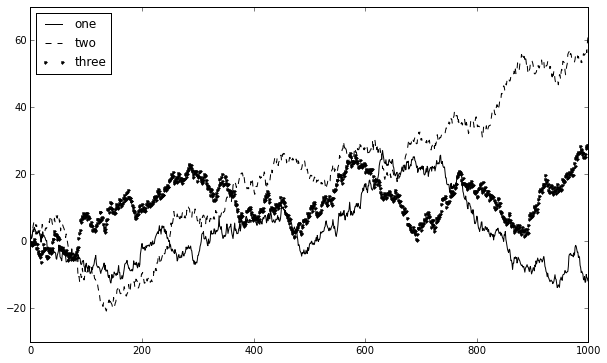

In [917]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')


###8.1.4 주석과 그림 추가

In [782]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

#ubuntu의 SSL에러를 잡기위해 추가한 코드

In [783]:
data = pd.read_csv('https://raw.githubusercontent.com/pydata/pydata-book/master/ch08/spx.csv', index_col=0, parse_dates=True)

In [784]:
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
1990-02-08,332.96
1990-02-09,333.62
1990-02-12,330.08
1990-02-13,331.02
1990-02-14,332.01


In [926]:

data = pd.read_csv('https://raw.githubusercontent.com/pydata/pydata-book/master/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

type(spx)
print spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

In [927]:
spx.asof?

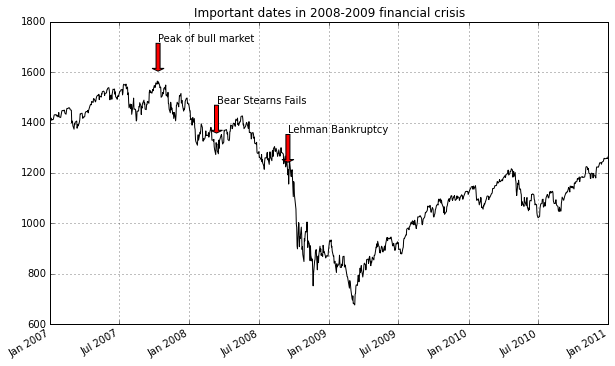

In [934]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='Red'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

In [928]:
ax.annotate?

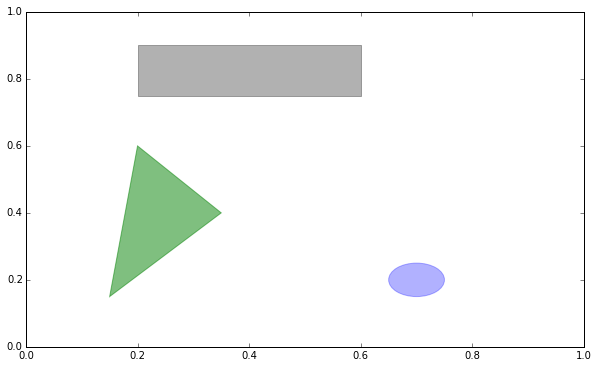

In [938]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.05, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

###8.1.5 그래프를 파일로 저장

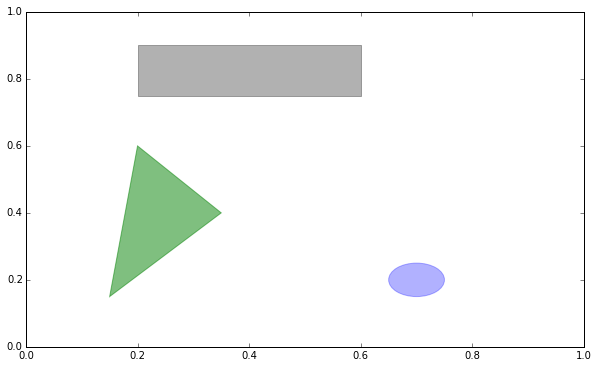

In [939]:
fig

In [940]:
fig.savefig('figpath.svg')

In [941]:
#그래프 간 최소 공백을 가지는 400DPI짜리 PNG파일을 만들려면 다음처럼 입력하면됨.
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [944]:
#savefig 메서드로 파일에 저잘할 수 있을 뿐 아니라 StringIO 같은 파일과 유사한 객체에도 저장할 수 있음.
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

In [943]:
plot_data

"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xd0\x00\x00\x01\xb0\x08\x06\x00\x00\x00\x80KR[\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x08ZIDATx\x9c\xed\xd6\xc1\r\xc0 \x10\xc0\xb0\xd2\xfdw>V /\x84dO\x90g\xd6\xcc\xcc\x07\x00\x00\x1c\xf9o\x07\x00\x00\xc0K\x0c4\x00\x00\x04\x06\x1a\x00\x00\x02\x03\r\x00\x00\x81\x81\x06\x00\x80\xc0@\x03\x00@`\xa0\x01\x00 0\xd0\x00\x00\x10\x18h\x00\x00\x08\x0c4\x00\x00\x04\x06\x1a\x00\x00\x02\x03\r\x00\x00\x81\x81\x06\x00\x80\xc0@\x03\x00@`\xa0\x01\x00 0\xd0\x00\x00\x10\x18h\x00\x00\x08\x0c4\x00\x00\x04\x06\x1a\x00\x00\x02\x03\r\x00\x00\x81\x81\x06\x00\x80\xc0@\x03\x00@`\xa0\x01\x00 0\xd0\x00\x00\x10\x18h\x00\x00\x08\x0c4\x00\x00\x04\x06\x1a\x00\x00\x02\x03\r\x00\x00\x81\x81\x06\x00\x80\xc0@\x03\x00@`\xa0\x01\x00 0\xd0\x00\x00\x10\x18h\x00\x00\x08\x0c4\x00\x00\x04\x06\x1a\x00\x00\x02\x03\r\x00\x00\x81\x81\x06\x00\x80\xc0@\x03\x00@`\xa0\x01\x00 0\xd0\x00\x00\x10\x18h\x00\x00\x08

### 8.1.6 matplotlib 설정

In [949]:
#Figure의 크기를 10x10으로 전역 설정해두고 싶다면 다음 코드를 실행
plt.rc('figure', figsize=(10, 10))

[]

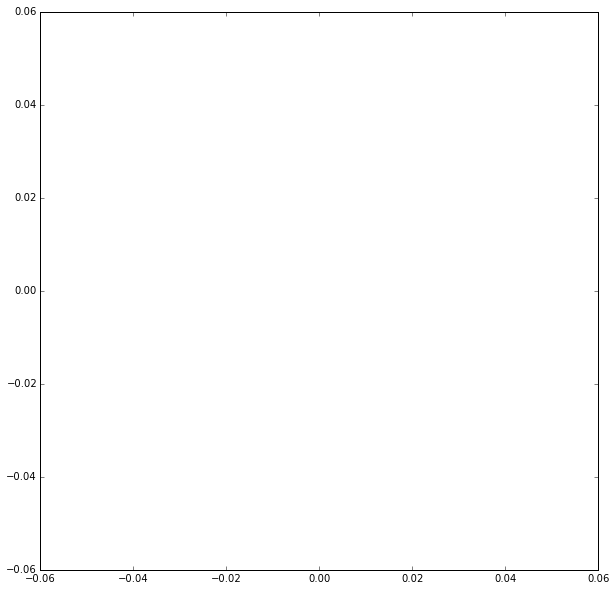

In [950]:
plt.plot()

##8.2 pandas에서 그래프 그리기

###8.2.1 선 그래프

In [959]:
 index=np.arange(0, 100, 10)

In [960]:
index

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [962]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.349309
10   -0.864396
20   -1.696846
30   -1.214540
40   -0.952787
50   -0.402255
60   -0.267151
70   -0.580521
80   -1.531383
90   -2.346414
dtype: float64

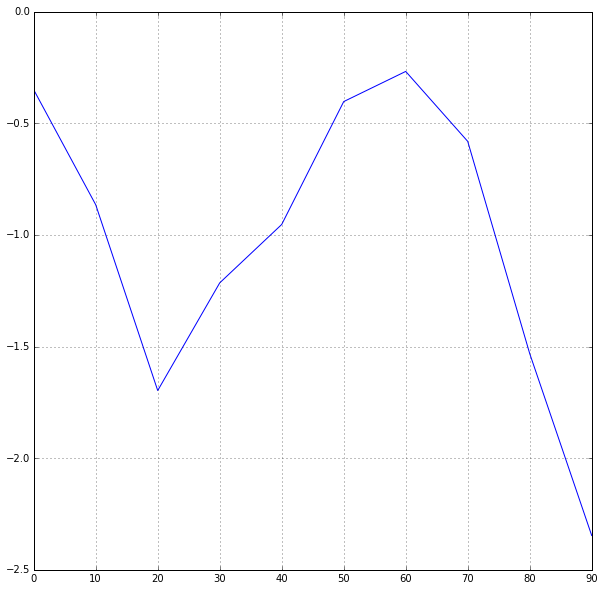

In [963]:
s.plot()

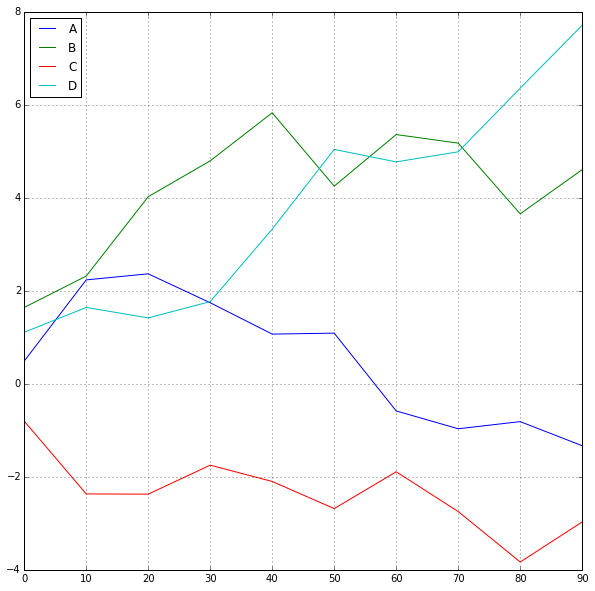

In [964]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()